In [1]:
# Get a Spark session
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Vermont').master("spark://spark-master:7077").getOrCreate()
spark

In [2]:
df = spark.read.csv('/home/jovyan/data/Vermont_Vendor_Payments.csv', header='true', inferSchema = True)
df = df.withColumn("Amount", df["Amount"].cast("double"))

In [3]:
# We can use the columns attribute just like with pandas
columns = df.columns
print('The column Names are:')
for i in columns:
    print(i)

The column Names are:
Quarter Ending
Department
UnitNo
Vendor Number
Vendor
City
State
DeptID Description
DeptID
Amount
Account
AcctNo
Fund Description
Fund


In [ ]:
# Get some stats
print('The total number of rows is:', df.count(), '\nThe total number of columns is:', len(df.columns))

In [ ]:
# Show first 5 rows
df.show(n=5)

In [ ]:
# Show first row
df.head()

In [4]:
# Get some more stats
df.describe().show()

+-------+--------------+--------------------+------------------+------------------+--------------------+--------+------------------+------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+
|summary|Quarter Ending|          Department|            UnitNo|     Vendor Number|              Vendor|    City|             State|DeptID Description|              DeptID|              Amount|             Account|            AcctNo|    Fund Description|                Fund|
+-------+--------------+--------------------+------------------+------------------+--------------------+--------+------------------+------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+
|  count|       1791775|             1791775|           1791775|           1791775|             1791775| 1049452|           1791727|           1791238|             1791775|

In [6]:
# Start by creating a temporary table query with SQL
df.createOrReplaceTempView('VermontVendor')
spark.sql(
'''
SELECT `Quarter Ending`, Department, Amount, State FROM VermontVendor
LIMIT 10
'''
).show()

+--------------+--------------------+-------+-----+
|Quarter Ending|          Department| Amount|State|
+--------------+--------------------+-------+-----+
|    09/30/2012|           Judiciary|  16.24|   VT|
|    09/30/2012|Department of Men...|9655.13|   VT|
|    09/30/2012|Human Services Ce...|   17.4|   VT|
|    09/30/2012|Personnel-Governm...| 280.66|   VT|
|    09/30/2012|Department of VT ...|   66.6|   VT|
|    09/30/2012|Office of the Def...|    4.4|   VT|
|    09/30/2012|Public Service De...| 2072.7|   VT|
|    09/30/2012|Agriculture, Food...|   9.21|   VT|
|    09/30/2012|Agency of Transpo...|   9.38|   VT|
|    09/30/2012|Unorganized Towns...|   33.3|   VT|
+--------------+--------------------+-------+-----+



In [7]:
# Or using Python
df.select('Quarter Ending', 'Department', 'Amount', 'State').show(10)

+--------------+--------------------+---------+-----+
|Quarter Ending|          Department|   Amount|State|
+--------------+--------------------+---------+-----+
|    12/31/2019|Vt Housing & Cons...|1075000.0|   VT|
|    12/31/2019|Vt Housing & Cons...|   4612.5|   VT|
|    12/31/2019|Vt Housing & Cons...|112916.67|   VT|
|    12/31/2019|Vt Housing & Cons...| 17152.74|   VT|
|    12/31/2019|Vt Housing & Cons...|   4850.0|   VT|
|    12/31/2019|Vt Housing & Cons...|   1755.0|   VT|
|    12/31/2019|Vt Housing & Cons...| 26837.54|   VT|
|    12/31/2019|Vt Housing & Cons...| 30396.35|   VT|
|    12/31/2019|Vt Housing & Cons...|  5430.17|   VT|
|    12/31/2019|Vt Housing & Cons...|   1000.0|   VT|
+--------------+--------------------+---------+-----+
only showing top 10 rows



In [8]:
# SQL filtering
spark.sql(
'''
SELECT `Quarter Ending`, Department, Amount, State FROM VermontVendor 
WHERE Department = 'Education'
LIMIT 10
'''
).show()

+--------------+----------+--------+-----+
|Quarter Ending|Department|  Amount|State|
+--------------+----------+--------+-----+
|    12/31/2012| Education|  302.12|   VT|
|    12/31/2012| Education|531548.0|   VT|
|    12/31/2012| Education| 14082.0|   VT|
|    12/31/2012| Education| 5337.66|   VT|
|    12/31/2012| Education|164436.0|   VT|
|    12/31/2012| Education|  8295.0|   VT|
|    12/31/2012| Education|   646.5|   VT|
|    12/31/2012| Education|    29.9|   VT|
|    12/31/2012| Education| 34159.0|   VT|
|    12/31/2012| Education|  2626.0|   VT|
+--------------+----------+--------+-----+



In [9]:
# Python filtering
df.select('Quarter Ending', 'Department', 'Amount', 'State').filter(df['Department'] == 'Education').show(10)

+--------------+----------+--------+-----+
|Quarter Ending|Department|  Amount|State|
+--------------+----------+--------+-----+
|    12/31/2012| Education|  302.12|   VT|
|    12/31/2012| Education|531548.0|   VT|
|    12/31/2012| Education| 14082.0|   VT|
|    12/31/2012| Education| 5337.66|   VT|
|    12/31/2012| Education|164436.0|   VT|
|    12/31/2012| Education|  8295.0|   VT|
|    12/31/2012| Education|   646.5|   VT|
|    12/31/2012| Education|    29.9|   VT|
|    12/31/2012| Education| 34159.0|   VT|
|    12/31/2012| Education|  2626.0|   VT|
+--------------+----------+--------+-----+
only showing top 10 rows



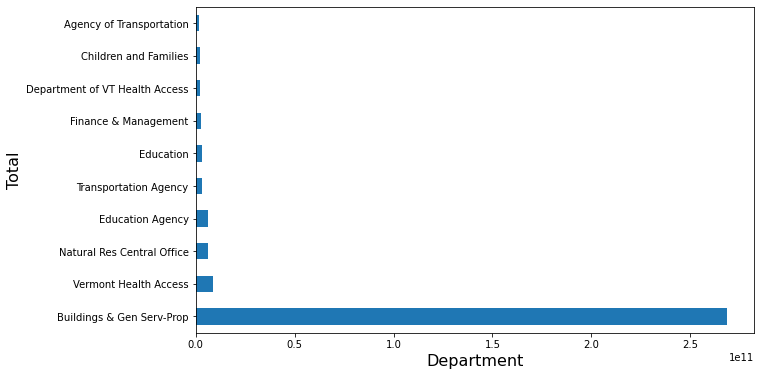

In [10]:
# Plotting (need to convert to Pandas as DataFrame doesn't support this)
import matplotlib.pyplot as plt 

plot_df = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor 
GROUP BY Department
ORDER BY Total DESC
LIMIT 10
'''
).toPandas()

fig,ax = plt.subplots(1,1,figsize=(10,6))
plot_df.plot(x = 'Department', y = 'Total', kind = 'barh', color = 'C0', ax = ax, legend = False)
ax.set_xlabel('Department', size = 16)
ax.set_ylabel('Total', size = 16)
#plt.savefig('barplot.png')
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


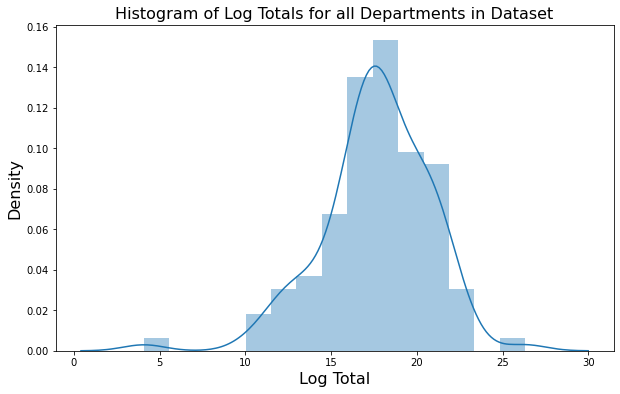

In [13]:
# Another plot
import numpy as np
import seaborn as sns

plot_df2 = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor 
GROUP BY Department
'''
).toPandas()
plt.figure(figsize = (10,6))
sns.distplot(np.log(plot_df2['Total']))
plt.title('Histogram of Log Totals for all Departments in Dataset', size = 16)
plt.ylabel('Density', size = 16)
plt.xlabel('Log Total', size = 16)
#plt.savefig('distplot.png')
plt.show()